In [3]:
import numpy as np
import scipy
from scipy import special
from numpy.polynomial.hermite import hermfit,hermval
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import math
from scipy.signal import savgol_filter

u=scipy.special.jvp(0,1.0,2)+scipy.special.jvp(0,1.0,1)/1.0
print(u)

-0.7651976865579666


In [15]:
import numpy as np
import scipy
from scipy import special
from numpy.polynomial.hermite import hermfit,hermval
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import math
from scipy.signal import savgol_filter

def fun(a_coe,x,y,dt):
    resk=0.0
# Collocation points
    for ik in range(1,len(x)-1):
        resk1=0.0
        resk2=0.0
        for jk in range(2,len(a_coe)):
            resk1=resk1+a_coe[jk]*ik*(ik-1)*x[ik]**(jk-2)
        for jk in range(len(a_coe)):
            resk2=resk2+a_coe[jk]*x[ik]**jk
        resk=resk+(resk2-y[ik]-resk1*dt)**2
# Boundary Condition
    resk1=0.0
    for jk in range(1,len(a_coe)):
        resk1=resk1+a_coe[jk]*x[0]**(jk-1)*jk
    resk=resk+(resk1+5.0)**2
    
    ik=len(x)-1
    resk1=0.0
    for jk in range(len(a_coe)):
        resk1=resk1+a_coe[jk]*x[ik]**(jk)
    resk=resk+(resk1-0.0)**2
    
    
    print (resk)
    return resk*0.5

def fun_der(a_coe,x,y,dt):
    dev=np.zeros(len(a_coe))
    resk=0.0
# Collocation points
    for ik in range(1,len(x)-1):
        resk1=0.0
        resk2=0.0
        for jk in range(2,len(a_coe)):
            resk1=resk1+a_coe[jk]*ik*(ik-1.0)*x[ik]**(jk-2)
        for jk in range(len(a_coe)):
            resk2=resk2+a_coe[jk]*x[ik]**jk
        resk=resk+(resk2-y[ik]-resk1*dt)
# Boundary Condition
    resk1=0.0
    for jk in range(1,len(a_coe)):
        resk1=resk1+a_coe[jk]*x[0]**(jk-1)*jk
    resk=resk+(resk1+5.0)
    
    for ik in range(1,len(x)):
        dev[0]=dev[0]+resk*1.0
        dev[1]=dev[1]+resk*x[ik]
        for jk in range(2,len(a_coe)):
            dev[jk]=dev[jk]+resk*(-x[ik]**(jk-2)*dt*ik*(ik-1.0)+x[ik]**jk)
    ik=0
    for jk in range(1,len(a_coe)):
        dev[jk]=dev[jk]+resk*(x[ik]**(jk-1)*jk)
    return dev

t=np.zeros(100)
for ik in range(100):
    t[ik]=0.1*ik
a_coe=np.zeros(11)
x=np.zeros(1000)
for ik in range(1000):
    x[ik]=ik*1.0/500.0
y=np.zeros(1000)
dt=0.1
tk=np.zeros(100)
for ik in range(1,100):
    a_coe[1]=-5.0
    res=scipy.optimize.minimize(fun,a_coe,args=(x,y,dt),method='L-BFGS-B')
    a_coe=res.x
    for kk in range(len(a_coe)):
        tk[ik]=tk[ik]+a_coe[kk]*(3.0/500.0)**kk
    for jk in range(1000):
        y[jk]=0.0
        for kk in range(len(a_coe)):
            y[jk]=y[jk]+a_coe[kk]*x[jk]**kk
    print (ik)
        

33283.35000000001
33283.34990010003
33283.3498668666
33288.313426621615
33291.280477851826
33296.5491036125
33305.946551652414
33322.84485818315
33353.491360997345
33409.53137564649
33512.839667180044
33704.93987250738
4.17083554573115e+16
4.170835545731155e+16
4.170835545731158e+16
4.170835545271805e+16
4.170835544881695e+16
4.170835544151556e+16
4.170835542779743e+16
4.1708355401934824e+16
4.170835535302609e+16
4.170835526027841e+16
4.170835508395525e+16
4.170835474798101e+16
18263.65309273526
18263.653025985313
18263.653020040103
18265.8435763086
18266.455645946346
18267.316614805284
18268.43279894149
18269.718528054265
18270.84015565088
18270.890880819818
18267.75761972601
18257.03922217737
18232.173477029577
18232.173410323245
18232.173404397337
18234.361670366106
18234.972694277098
18235.832182830844
18236.946372305174
18238.22964911163
18239.34883388797
18239.39863977752
18236.269963155017
18225.571179331808
18106.74101772931
18106.740951197757
18106.740945349142
18108.920050118

2441.1558985721863
2441.1311285719844
2441.010856629994
2441.010140676147
2421.4553770932857
2421.455364881279
2421.4553724301304
2421.4454488890933
2421.3477346278983
2421.243992445549
2421.1120126397104
2420.9146296143354
2420.577109575158
2419.955897121752
2418.8334981047233
2417.1499497158816
2420.6083636797016
2420.6083516446997
2420.608359291619
2420.5875561467924
2420.4832306588996
2420.368532291048
2420.218308805199
2419.9904311304736
2419.601796074308
2418.8947559144153
2417.6281514203847
2415.7024444670033
2420.5116999166553
2420.5116879125667
2420.51169557661
2420.4889926109786
2420.3835126558615
2420.266901094334
2420.1134918561947
2419.8802891374494
2419.482728262436
2418.7607006760513
2417.4689146983965
2415.500921473656
2420.4958805451497
2420.4958685466445
2420.495876213776
2420.4728304447867
2420.3671421777894
2420.2501853999133
2420.096201325141
2419.862037756318
2419.4628663080093
2418.738134392819
2417.4418046723504
2415.46618131969
2420.4930624296017
2420.493050432

312.2928697192629
313.68498401184263
286.0987719755282
286.09877542497316
286.0987759431786
285.9665067557885
285.93651553439196
285.8981089101376
285.84822847795795
285.781858463301
285.69432502222105
285.60251260532084
285.65483949524486
286.6136992922036
284.2949112846086
284.29491464074
284.2949150657878
284.1704019716692
284.14472503485774
284.11228447962355
284.0703237094155
284.0135717587976
283.93549243602985
283.8470875441053
283.88155164991406
284.7652871192143
284.0492162510062
284.0492195895571
284.0492199970545
283.9261681277103
283.9013039892109
283.8699874235358
283.8295186939557
283.7745787578359
283.698280562681
283.61051763827027
283.6416164489783
284.51119871964204
284.0056073050428
284.00561064023026
284.0056110443695
283.8828387648657
283.85813014669054
283.8270286444788
283.78684540102626
283.732252174634
283.65629477933
283.5686546885846
283.59910958581844
284.4659837922478
283.9973634365163
283.99736677105824
283.9973671745531
283.87464855024643
283.849969777481

283.8169859266532
283.7768704902478
283.72235961238687
283.6464831619326
283.5588722459422
283.58917420449274
284.4554052068372
283.99541016325463
283.9954134976431
283.9954139009849
283.87270802807643
283.84803634820764
283.81698592665214
283.77687049024723
283.72235961238624
283.64648316193285
283.55887224594323
283.58917420449563
284.45540520684403
2
283.9034702574954
283.9034735885038
283.9034739902319
283.780962927768
283.756413304557
283.7255772753048
283.6858425870258
283.63201509107176
283.5573769854599
283.47202906464634
283.50649713158396
284.3804473831154
191986525472404.62
191986525472405.3
191986525472406.84
191986525338832.94
191986525179372.22
191986524856141.03
191986524207882.53
191986522917454.66
191986520362354.1
191986515322441.47
191986505408643.2
191986485946465.4
297.8624688152637
297.86247233475126
297.86247309673604
297.7073223119415
297.64380729346783
297.5339873829934
297.33584598795414
296.96669303066426
296.26769743181944
294.95081005461066
292.562769043409

283.6320144746952
283.5573763776769
283.4720284724447
283.50649656783446
284.3804468716476
283.90346962737993
283.90347295838797
283.9034733601162
283.7809622991599
283.7564126768461
283.72557664918446
283.6858419637379
283.6320144728684
283.55737637646007
283.47202847243045
283.50649657018585
284.3804468786439
283.90346962693013
283.9034729579386
283.9034733596666
283.78096229871625
283.7564126764092
283.72557664876166
283.6858419633438
283.63201447253135
283.55737637623514
283.4720284724274
283.50649657061945
284.3804468799324
283.9034696268483
283.90347295785654
283.9034733595846
283.7809622986351
283.75641267632966
283.7255766486847
283.68584196327214
283.63201447246985
283.5573763761944
283.47202847242716
283.5064965706986
284.3804468801704
283.90346962683236
283.9034729578407
283.90347335956875
283.78096229861967
283.7564126763142
283.72557664866986
283.6858419632582
283.63201447245785
283.5573763761865
283.4720284724267
283.50649657071347
284.3804468802142
283.90346962682963
283

283.5573766147881
283.47202847533134
283.5064961099881
284.3804455093184
283.90346971482745
283.90347304583577
283.9034734475638
283.78096238546385
283.75641276178465
283.7255767313548
283.6858420403568
283.6320145384375
283.55737642014924
283.4720284729623
283.50649648582396
284.3804466276234
283.9034696430431
283.9034729740515
283.9034733757797
283.7809623146183
283.75641269206017
283.7255766639023
283.6858419774616
283.63201448461336
283.55737638428525
283.47202847252527
283.50649655507465
284.38044683367997
283.9034696298164
283.90347296082496
283.90347336255286
283.7809623015649
283.756412679213
283.7255766514739
283.6858419658729
283.6320144746952
283.5573763776769
283.4720284724447
283.50649656783446
284.3804468716476
283.90346962737993
283.90347295838797
283.9034733601162
283.7809622991599
283.7564126768461
283.72557664918446
283.6858419637379
283.6320144728684
283.55737637646007
283.47202847243045
283.50649657018585
284.3804468786439
283.90346962693013
283.9034729579386
283.90

283.63202502022864
283.55738340439586
283.4720285583346
283.5064830007152
284.3804065017579
283.90347221875743
283.9034755497661
283.90347595149467
283.7809648566436
283.75641519386534
283.72557908418236
283.6858442342362
283.63201641591434
283.55737767113555
283.4720284882022
283.5064940702785
284.3804394401078
283.9034701044114
283.90347343542004
283.903473837148
283.78096276995205
283.7564131401894
283.72557709742875
283.6858423817001
283.6320148305522
283.5573766147881
283.47202847533134
283.5064961099881
284.3804455093184
283.90346971482745
283.90347304583577
283.9034734475638
283.78096238546385
283.75641276178465
283.7255767313548
283.6858420403568
283.6320145384375
283.55737642014924
283.4720284729623
283.50649648582396
284.3804466276234
283.9034696430431
283.9034729740515
283.9034733757797
283.7809623146183
283.75641269206017
283.7255766639023
283.6858419774616
283.63201448461336
283.55737638428525
283.47202847252527
283.50649655507465
284.38044683367997
283.9034696298164
283.9

283.5989249398235
283.480635978174
283.45030712387694
284.1970519259289
283.9159655064482
283.9159688383801
283.9159692418719
283.7932983308151
283.7685578792959
283.73733503593314
283.69682456957844
283.64145280427124
283.56375698086634
283.4723777389734
283.49498184878735
284.34564148467086
283.90572812818107
283.90573145935934
283.9057318614122
283.7831913810204
283.75860663775615
283.7276994190254
283.68782195583805
283.6337102506835
283.5585093982841
283.4720514633323
283.50433606651734
284.3739998688408
283.90388428582355
283.9038876168631
283.90388801865106
283.78137153808495
283.75681544583597
283.72596630344975
283.6862053156764
283.6323254672265
283.5575837006525
283.4720313081921
283.5060971654609
284.379257819419
283.90354598070695
283.90354931172095
283.90354971346005
283.7810376539407
283.75648683954125
283.725648395491
283.68590886383987
283.6320717260845
283.5574145284449
283.4720289474153
283.5064229323485
284.38022774693906
283.90348369395747
283.903487024967
283.9034

191987269415869.5
191987269415870.94
191987269282296.3
191987269122834.97
191987268799602.6
191987268151341.8
191987266860909.72
191987264305801.2
191987259265873.56
191987249352046.5
191987229889814.12
297.86242726804926
297.86243078753824
297.8624315495234
297.70728070809196
297.64376568409176
297.53394578631344
297.335804453205
296.9666516761408
296.2676565248388
294.95077017725885
292.5627314326464
288.68096098741717
284.537533166801
284.53753652613966
284.5375369820165
284.41011992431964
284.37971351832334
284.33700563969535
284.2734612813331
284.1722381032426
284.0037545939102
283.73329749176924
283.40364516652176
283.56277600688503
283.9784176817918
283.9784210178418
283.97842142920604
283.8550373229176
283.829445458237
283.79649677852626
283.75252504913277
283.69026327147697
283.5989249398235
283.480635978174
283.45030712387694
284.1970519259289
283.9159655064482
283.9159688383801
283.9159692418719
283.7932983308151
283.7685578792959
283.73733503593314
283.69682456957844
283.64

283.5573763761944
283.47202847242716
283.5064965706986
284.3804468801704
283.90346962683236
283.9034729578407
283.90347335956875
283.78096229861967
283.7564126763142
283.72557664866986
283.6858419632582
283.63201447245785
283.5573763761865
283.4720284724267
283.50649657071347
284.3804468802142
283.90346962682963
283.90347295783806
283.9034733595661
283.78096229861717
283.7564126763119
283.72557664866747
283.685841963256
283.63201447245615
283.5573763761853
283.47202847242744
283.50649657071676
284.3804468802226
283.9034696268291
283.90347295783755
283.90347335956545
283.7809622986164
283.7564126763107
283.72557664866713
283.68584196325514
283.63201447245575
283.5573763761848
283.4720284724267
283.5064965707167
284.3804468802232
13
283.9034696268284
283.9034729578368
283.90347335956494
283.78096229861615
283.75641267631045
283.72557664866645
283.6858419632548
283.6320144724553
283.55737637618404
283.4720284724266
283.5064965707164
284.38044688022364
191987269415868.66
191987269415869.5


283.9034729740515
283.9034733757797
283.7809623146183
283.75641269206017
283.7255766639023
283.6858419774616
283.63201448461336
283.55737638428525
283.47202847252527
283.50649655507465
284.38044683367997
283.9034696298164
283.90347296082496
283.90347336255286
283.7809623015649
283.756412679213
283.7255766514739
283.6858419658729
283.6320144746952
283.5573763776769
283.4720284724447
283.50649656783446
284.3804468716476
283.90346962737993
283.90347295838797
283.9034733601162
283.7809622991599
283.7564126768461
283.72557664918446
283.6858419637379
283.6320144728684
283.55737637646007
283.47202847243045
283.50649657018585
284.3804468786439
283.90346962693013
283.9034729579386
283.9034733596666
283.78096229871625
283.7564126764092
283.72557664876166
283.6858419633438
283.63201447253135
283.55737637623514
283.4720284724274
283.50649657061945
284.3804468799324
283.9034696268483
283.90347295785654
283.9034733595846
283.7809622986351
283.75641267632966
283.7255766486847
283.68584196327214
283.6

284.38022774693906
283.90348369395747
283.903487024967
283.9034874266971
283.7809761817545
283.75642633979726
283.7255898669132
283.68585428854755
283.63202502022864
283.55738340439586
283.4720285583346
283.5064830007152
284.3804065017579
283.90347221875743
283.9034755497661
283.90347595149467
283.7809648566436
283.75641519386534
283.72557908418236
283.6858442342362
283.63201641591434
283.55737767113555
283.4720284882022
283.5064940702785
284.3804394401078
283.9034701044114
283.90347343542004
283.903473837148
283.78096276995205
283.7564131401894
283.72557709742875
283.6858423817001
283.6320148305522
283.5573766147881
283.47202847533134
283.5064961099881
284.3804455093184
283.90346971482745
283.90347304583577
283.9034734475638
283.78096238546385
283.75641276178465
283.7255767313548
283.6858420403568
283.6320145384375
283.55737642014924
283.4720284729623
283.50649648582396
284.3804466276234
283.9034696430431
283.9034729740515
283.9034733757797
283.7809623146183
283.75641269206017
283.725

283.79649677852626
283.75252504913277
283.69026327147697
283.5989249398235
283.480635978174
283.45030712387694
284.1970519259289
283.9159655064482
283.9159688383801
283.9159692418719
283.7932983308151
283.7685578792959
283.73733503593314
283.69682456957844
283.64145280427124
283.56375698086634
283.4723777389734
283.49498184878735
284.34564148467086
283.90572812818107
283.90573145935934
283.9057318614122
283.7831913810204
283.75860663775615
283.7276994190254
283.68782195583805
283.6337102506835
283.5585093982841
283.4720514633323
283.50433606651734
284.3739998688408
283.90388428582355
283.9038876168631
283.90388801865106
283.78137153808495
283.75681544583597
283.72596630344975
283.6862053156764
283.6323254672265
283.5575837006525
283.4720313081921
283.5060971654609
284.379257819419
283.90354598070695
283.90354931172095
283.90354971346005
283.7810376539407
283.75648683954125
283.725648395491
283.68590886383987
283.6320717260845
283.5574145284449
283.4720289474153
283.5064229323485
284.38

284.3804468802232
20
283.9034696268284
283.9034729578368
283.90347335956494
283.78096229861615
283.75641267631045
283.72557664866645
283.6858419632548
283.6320144724553
283.55737637618404
283.4720284724266
283.5064965707164
284.38044688022364
191987269415868.66
191987269415869.5
191987269415870.94
191987269282296.3
191987269122834.97
191987268799602.6
191987268151341.8
191987266860909.72
191987264305801.2
191987259265873.56
191987249352046.5
191987229889814.12
297.86242726804926
297.86243078753824
297.8624315495234
297.70728070809196
297.64376568409176
297.53394578631344
297.335804453205
296.9666516761408
296.2676565248388
294.95077017725885
292.5627314326464
288.68096098741717
284.537533166801
284.53753652613966
284.5375369820165
284.41011992431964
284.37971351832334
284.33700563969535
284.2734612813331
284.1722381032426
284.0037545939102
283.73329749176924
283.40364516652176
283.56277600688503
283.9784176817918
283.9784210178418
283.97842142920604
283.8550373229176
283.829445458237
2

283.68584196327214
283.63201447246985
283.5573763761944
283.47202847242716
283.5064965706986
284.3804468801704
283.90346962683236
283.9034729578407
283.90347335956875
283.78096229861967
283.7564126763142
283.72557664866986
283.6858419632582
283.63201447245785
283.5573763761865
283.4720284724267
283.50649657071347
284.3804468802142
283.90346962682963
283.90347295783806
283.9034733595661
283.78096229861717
283.7564126763119
283.72557664866747
283.685841963256
283.63201447245615
283.5573763761853
283.47202847242744
283.50649657071676
284.3804468802226
283.9034696268291
283.90347295783755
283.90347335956545
283.7809622986164
283.7564126763107
283.72557664866713
283.68584196325514
283.63201447245575
283.5573763761848
283.4720284724267
283.5064965707167
284.3804468802232
22
283.9034696268284
283.9034729578368
283.90347335956494
283.78096229861615
283.75641267631045
283.72557664866645
283.6858419632548
283.6320144724553
283.55737637618404
283.4720284724266
283.5064965707164
284.38044688022364

284.38044683367997
283.9034696298164
283.90347296082496
283.90347336255286
283.7809623015649
283.756412679213
283.7255766514739
283.6858419658729
283.6320144746952
283.5573763776769
283.4720284724447
283.50649656783446
284.3804468716476
283.90346962737993
283.90347295838797
283.9034733601162
283.7809622991599
283.7564126768461
283.72557664918446
283.6858419637379
283.6320144728684
283.55737637646007
283.47202847243045
283.50649657018585
284.3804468786439
283.90346962693013
283.9034729579386
283.9034733596666
283.78096229871625
283.7564126764092
283.72557664876166
283.6858419633438
283.63201447253135
283.55737637623514
283.4720284724274
283.50649657061945
284.3804468799324
283.9034696268483
283.90347295785654
283.9034733595846
283.7809622986351
283.75641267632966
283.7255766486847
283.68584196327214
283.63201447246985
283.5573763761944
283.47202847242716
283.5064965706986
284.3804468801704
283.90346962683236
283.9034729578407
283.90347335956875
283.78096229861967
283.7564126763142
283.7

283.90348369395747
283.903487024967
283.9034874266971
283.7809761817545
283.75642633979726
283.7255898669132
283.68585428854755
283.63202502022864
283.55738340439586
283.4720285583346
283.5064830007152
284.3804065017579
283.90347221875743
283.9034755497661
283.90347595149467
283.7809648566436
283.75641519386534
283.72557908418236
283.6858442342362
283.63201641591434
283.55737767113555
283.4720284882022
283.5064940702785
284.3804394401078
283.9034701044114
283.90347343542004
283.903473837148
283.78096276995205
283.7564131401894
283.72557709742875
283.6858423817001
283.6320148305522
283.5573766147881
283.47202847533134
283.5064961099881
284.3804455093184
283.90346971482745
283.90347304583577
283.9034734475638
283.78096238546385
283.75641276178465
283.7255767313548
283.6858420403568
283.6320145384375
283.55737642014924
283.4720284729623
283.50649648582396
284.3804466276234
283.9034696430431
283.9034729740515
283.9034733757797
283.7809623146183
283.75641269206017
283.7255766639023
283.6858

283.45030712387694
284.1970519259289
283.9159655064482
283.9159688383801
283.9159692418719
283.7932983308151
283.7685578792959
283.73733503593314
283.69682456957844
283.64145280427124
283.56375698086634
283.4723777389734
283.49498184878735
284.34564148467086
283.90572812818107
283.90573145935934
283.9057318614122
283.7831913810204
283.75860663775615
283.7276994190254
283.68782195583805
283.6337102506835
283.5585093982841
283.4720514633323
283.50433606651734
284.3739998688408
283.90388428582355
283.9038876168631
283.90388801865106
283.78137153808495
283.75681544583597
283.72596630344975
283.6862053156764
283.6323254672265
283.5575837006525
283.4720313081921
283.5060971654609
284.379257819419
283.90354598070695
283.90354931172095
283.90354971346005
283.7810376539407
283.75648683954125
283.725648395491
283.68590886383987
283.6320717260845
283.5574145284449
283.4720289474153
283.5064229323485
284.38022774693906
283.90348369395747
283.903487024967
283.9034874266971
283.7809761817545
283.756

284.3804468802232
29
283.9034696268284
283.9034729578368
283.90347335956494
283.78096229861615
283.75641267631045
283.72557664866645
283.6858419632548
283.6320144724553
283.55737637618404
283.4720284724266
283.5064965707164
284.38044688022364
191987269415868.66
191987269415869.5
191987269415870.94
191987269282296.3
191987269122834.97
191987268799602.6
191987268151341.8
191987266860909.72
191987264305801.2
191987259265873.56
191987249352046.5
191987229889814.12
297.86242726804926
297.86243078753824
297.8624315495234
297.70728070809196
297.64376568409176
297.53394578631344
297.335804453205
296.9666516761408
296.2676565248388
294.95077017725885
292.5627314326464
288.68096098741717
284.537533166801
284.53753652613966
284.5375369820165
284.41011992431964
284.37971351832334
284.33700563969535
284.2734612813331
284.1722381032426
284.0037545939102
283.73329749176924
283.40364516652176
283.56277600688503
283.9784176817918
283.9784210178418
283.97842142920604
283.8550373229176
283.829445458237
2

283.63201447246985
283.5573763761944
283.47202847242716
283.5064965706986
284.3804468801704
283.90346962683236
283.9034729578407
283.90347335956875
283.78096229861967
283.7564126763142
283.72557664866986
283.6858419632582
283.63201447245785
283.5573763761865
283.4720284724267
283.50649657071347
284.3804468802142
283.90346962682963
283.90347295783806
283.9034733595661
283.78096229861717
283.7564126763119
283.72557664866747
283.685841963256
283.63201447245615
283.5573763761853
283.47202847242744
283.50649657071676
284.3804468802226
283.9034696268291
283.90347295783755
283.90347335956545
283.7809622986164
283.7564126763107
283.72557664866713
283.68584196325514
283.63201447245575
283.5573763761848
283.4720284724267
283.5064965707167
284.3804468802232
31
283.9034696268284
283.9034729578368
283.90347335956494
283.78096229861615
283.75641267631045
283.72557664866645
283.6858419632548
283.6320144724553
283.55737637618404
283.4720284724266
283.5064965707164
284.38044688022364
191987269415868.66

283.90347296082496
283.90347336255286
283.7809623015649
283.756412679213
283.7255766514739
283.6858419658729
283.6320144746952
283.5573763776769
283.4720284724447
283.50649656783446
284.3804468716476
283.90346962737993
283.90347295838797
283.9034733601162
283.7809622991599
283.7564126768461
283.72557664918446
283.6858419637379
283.6320144728684
283.55737637646007
283.47202847243045
283.50649657018585
284.3804468786439
283.90346962693013
283.9034729579386
283.9034733596666
283.78096229871625
283.7564126764092
283.72557664876166
283.6858419633438
283.63201447253135
283.55737637623514
283.4720284724274
283.50649657061945
284.3804468799324
283.9034696268483
283.90347295785654
283.9034733595846
283.7809622986351
283.75641267632966
283.7255766486847
283.68584196327214
283.63201447246985
283.5573763761944
283.47202847242716
283.5064965706986
284.3804468801704
283.90346962683236
283.9034729578407
283.90347335956875
283.78096229861967
283.7564126763142
283.72557664866986
283.6858419632582
283.6

283.55737767113555
283.4720284882022
283.5064940702785
284.3804394401078
283.9034701044114
283.90347343542004
283.903473837148
283.78096276995205
283.7564131401894
283.72557709742875
283.6858423817001
283.6320148305522
283.5573766147881
283.47202847533134
283.5064961099881
284.3804455093184
283.90346971482745
283.90347304583577
283.9034734475638
283.78096238546385
283.75641276178465
283.7255767313548
283.6858420403568
283.6320145384375
283.55737642014924
283.4720284729623
283.50649648582396
284.3804466276234
283.9034696430431
283.9034729740515
283.9034733757797
283.7809623146183
283.75641269206017
283.7255766639023
283.6858419774616
283.63201448461336
283.55737638428525
283.47202847252527
283.50649655507465
284.38044683367997
283.9034696298164
283.90347296082496
283.90347336255286
283.7809623015649
283.756412679213
283.7255766514739
283.6858419658729
283.6320144746952
283.5573763776769
283.4720284724447
283.50649656783446
284.3804468716476
283.90346962737993
283.90347295838797
283.9034

283.6337102506835
283.5585093982841
283.4720514633323
283.50433606651734
284.3739998688408
283.90388428582355
283.9038876168631
283.90388801865106
283.78137153808495
283.75681544583597
283.72596630344975
283.6862053156764
283.6323254672265
283.5575837006525
283.4720313081921
283.5060971654609
284.379257819419
283.90354598070695
283.90354931172095
283.90354971346005
283.7810376539407
283.75648683954125
283.725648395491
283.68590886383987
283.6320717260845
283.5574145284449
283.4720289474153
283.5064229323485
284.38022774693906
283.90348369395747
283.903487024967
283.9034874266971
283.7809761817545
283.75642633979726
283.7255898669132
283.68585428854755
283.63202502022864
283.55738340439586
283.4720285583346
283.5064830007152
284.3804065017579
283.90347221875743
283.9034755497661
283.90347595149467
283.7809648566436
283.75641519386534
283.72557908418236
283.6858442342362
283.63201641591434
283.55737767113555
283.4720284882022
283.5064940702785
284.3804394401078
283.9034701044114
283.9034

297.70728070809196
297.64376568409176
297.53394578631344
297.335804453205
296.9666516761408
296.2676565248388
294.95077017725885
292.5627314326464
288.68096098741717
284.537533166801
284.53753652613966
284.5375369820165
284.41011992431964
284.37971351832334
284.33700563969535
284.2734612813331
284.1722381032426
284.0037545939102
283.73329749176924
283.40364516652176
283.56277600688503
283.9784176817918
283.9784210178418
283.97842142920604
283.8550373229176
283.829445458237
283.79649677852626
283.75252504913277
283.69026327147697
283.5989249398235
283.480635978174
283.45030712387694
284.1970519259289
283.9159655064482
283.9159688383801
283.9159692418719
283.7932983308151
283.7685578792959
283.73733503593314
283.69682456957844
283.64145280427124
283.56375698086634
283.4723777389734
283.49498184878735
284.34564148467086
283.90572812818107
283.90573145935934
283.9057318614122
283.7831913810204
283.75860663775615
283.7276994190254
283.68782195583805
283.6337102506835
283.5585093982841
283.4

283.72557664866986
283.6858419632582
283.63201447245785
283.5573763761865
283.4720284724267
283.50649657071347
284.3804468802142
283.90346962682963
283.90347295783806
283.9034733595661
283.78096229861717
283.7564126763119
283.72557664866747
283.685841963256
283.63201447245615
283.5573763761853
283.47202847242744
283.50649657071676
284.3804468802226
283.9034696268291
283.90347295783755
283.90347335956545
283.7809622986164
283.7564126763107
283.72557664866713
283.68584196325514
283.63201447245575
283.5573763761848
283.4720284724267
283.5064965707167
284.3804468802232
40
283.9034696268284
283.9034729578368
283.90347335956494
283.78096229861615
283.75641267631045
283.72557664866645
283.6858419632548
283.6320144724553
283.55737637618404
283.4720284724266
283.5064965707164
284.38044688022364
191987269415868.66
191987269415869.5
191987269415870.94
191987269282296.3
191987269122834.97
191987268799602.6
191987268151341.8
191987266860909.72
191987264305801.2
191987259265873.56
191987249352046.5


283.6320144746952
283.5573763776769
283.4720284724447
283.50649656783446
284.3804468716476
283.90346962737993
283.90347295838797
283.9034733601162
283.7809622991599
283.7564126768461
283.72557664918446
283.6858419637379
283.6320144728684
283.55737637646007
283.47202847243045
283.50649657018585
284.3804468786439
283.90346962693013
283.9034729579386
283.9034733596666
283.78096229871625
283.7564126764092
283.72557664876166
283.6858419633438
283.63201447253135
283.55737637623514
283.4720284724274
283.50649657061945
284.3804468799324
283.9034696268483
283.90347295785654
283.9034733595846
283.7809622986351
283.75641267632966
283.7255766486847
283.68584196327214
283.63201447246985
283.5573763761944
283.47202847242716
283.5064965706986
284.3804468801704
283.90346962683236
283.9034729578407
283.90347335956875
283.78096229861967
283.7564126763142
283.72557664866986
283.6858419632582
283.63201447245785
283.5573763761865
283.4720284724267
283.50649657071347
284.3804468802142
283.90346962682963
283

283.4720285583346
283.5064830007152
284.3804065017579
283.90347221875743
283.9034755497661
283.90347595149467
283.7809648566436
283.75641519386534
283.72557908418236
283.6858442342362
283.63201641591434
283.55737767113555
283.4720284882022
283.5064940702785
284.3804394401078
283.9034701044114
283.90347343542004
283.903473837148
283.78096276995205
283.7564131401894
283.72557709742875
283.6858423817001
283.6320148305522
283.5573766147881
283.47202847533134
283.5064961099881
284.3804455093184
283.90346971482745
283.90347304583577
283.9034734475638
283.78096238546385
283.75641276178465
283.7255767313548
283.6858420403568
283.6320145384375
283.55737642014924
283.4720284729623
283.50649648582396
284.3804466276234
283.9034696430431
283.9034729740515
283.9034733757797
283.7809623146183
283.75641269206017
283.7255766639023
283.6858419774616
283.63201448461336
283.55737638428525
283.47202847252527
283.50649655507465
284.38044683367997
283.9034696298164
283.90347296082496
283.90347336255286
283.7

283.68782195583805
283.6337102506835
283.5585093982841
283.4720514633323
283.50433606651734
284.3739998688408
283.90388428582355
283.9038876168631
283.90388801865106
283.78137153808495
283.75681544583597
283.72596630344975
283.6862053156764
283.6323254672265
283.5575837006525
283.4720313081921
283.5060971654609
284.379257819419
283.90354598070695
283.90354931172095
283.90354971346005
283.7810376539407
283.75648683954125
283.725648395491
283.68590886383987
283.6320717260845
283.5574145284449
283.4720289474153
283.5064229323485
284.38022774693906
283.90348369395747
283.903487024967
283.9034874266971
283.7809761817545
283.75642633979726
283.7255898669132
283.68585428854755
283.63202502022864
283.55738340439586
283.4720285583346
283.5064830007152
284.3804065017579
283.90347221875743
283.9034755497661
283.90347595149467
283.7809648566436
283.75641519386534
283.72557908418236
283.6858442342362
283.63201641591434
283.55737767113555
283.4720284882022
283.5064940702785
284.3804394401078
283.903

191987264305801.2
191987259265873.56
191987249352046.5
191987229889814.12
297.86242726804926
297.86243078753824
297.8624315495234
297.70728070809196
297.64376568409176
297.53394578631344
297.335804453205
296.9666516761408
296.2676565248388
294.95077017725885
292.5627314326464
288.68096098741717
284.537533166801
284.53753652613966
284.5375369820165
284.41011992431964
284.37971351832334
284.33700563969535
284.2734612813331
284.1722381032426
284.0037545939102
283.73329749176924
283.40364516652176
283.56277600688503
283.9784176817918
283.9784210178418
283.97842142920604
283.8550373229176
283.829445458237
283.79649677852626
283.75252504913277
283.69026327147697
283.5989249398235
283.480635978174
283.45030712387694
284.1970519259289
283.9159655064482
283.9159688383801
283.9159692418719
283.7932983308151
283.7685578792959
283.73733503593314
283.69682456957844
283.64145280427124
283.56375698086634
283.4723777389734
283.49498184878735
284.34564148467086
283.90572812818107
283.90573145935934
283

283.9034729578407
283.90347335956875
283.78096229861967
283.7564126763142
283.72557664866986
283.6858419632582
283.63201447245785
283.5573763761865
283.4720284724267
283.50649657071347
284.3804468802142
283.90346962682963
283.90347295783806
283.9034733595661
283.78096229861717
283.7564126763119
283.72557664866747
283.685841963256
283.63201447245615
283.5573763761853
283.47202847242744
283.50649657071676
284.3804468802226
283.9034696268291
283.90347295783755
283.90347335956545
283.7809622986164
283.7564126763107
283.72557664866713
283.68584196325514
283.63201447245575
283.5573763761848
283.4720284724267
283.5064965707167
284.3804468802232
49
283.9034696268284
283.9034729578368
283.90347335956494
283.78096229861615
283.75641267631045
283.72557664866645
283.6858419632548
283.6320144724553
283.55737637618404
283.4720284724266
283.5064965707164
284.38044688022364
191987269415868.66
191987269415869.5
191987269415870.94
191987269282296.3
191987269122834.97
191987268799602.6
191987268151341.8


284.3804468716476
283.90346962737993
283.90347295838797
283.9034733601162
283.7809622991599
283.7564126768461
283.72557664918446
283.6858419637379
283.6320144728684
283.55737637646007
283.47202847243045
283.50649657018585
284.3804468786439
283.90346962693013
283.9034729579386
283.9034733596666
283.78096229871625
283.7564126764092
283.72557664876166
283.6858419633438
283.63201447253135
283.55737637623514
283.4720284724274
283.50649657061945
284.3804468799324
283.9034696268483
283.90347295785654
283.9034733595846
283.7809622986351
283.75641267632966
283.7255766486847
283.68584196327214
283.63201447246985
283.5573763761944
283.47202847242716
283.5064965706986
284.3804468801704
283.90346962683236
283.9034729578407
283.90347335956875
283.78096229861967
283.7564126763142
283.72557664866986
283.6858419632582
283.63201447245785
283.5573763761865
283.4720284724267
283.50649657071347
284.3804468802142
283.90346962682963
283.90347295783806
283.9034733595661
283.78096229861717
283.7564126763119
28

283.75641519386534
283.72557908418236
283.6858442342362
283.63201641591434
283.55737767113555
283.4720284882022
283.5064940702785
284.3804394401078
283.9034701044114
283.90347343542004
283.903473837148
283.78096276995205
283.7564131401894
283.72557709742875
283.6858423817001
283.6320148305522
283.5573766147881
283.47202847533134
283.5064961099881
284.3804455093184
283.90346971482745
283.90347304583577
283.9034734475638
283.78096238546385
283.75641276178465
283.7255767313548
283.6858420403568
283.6320145384375
283.55737642014924
283.4720284729623
283.50649648582396
284.3804466276234
283.9034696430431
283.9034729740515
283.9034733757797
283.7809623146183
283.75641269206017
283.7255766639023
283.6858419774616
283.63201448461336
283.55737638428525
283.47202847252527
283.50649655507465
284.38044683367997
283.9034696298164
283.90347296082496
283.90347336255286
283.7809623015649
283.756412679213
283.7255766514739
283.6858419658729
283.6320144746952
283.5573763776769
283.4720284724447
283.5064

283.69682456957844
283.64145280427124
283.56375698086634
283.4723777389734
283.49498184878735
284.34564148467086
283.90572812818107
283.90573145935934
283.9057318614122
283.7831913810204
283.75860663775615
283.7276994190254
283.68782195583805
283.6337102506835
283.5585093982841
283.4720514633323
283.50433606651734
284.3739998688408
283.90388428582355
283.9038876168631
283.90388801865106
283.78137153808495
283.75681544583597
283.72596630344975
283.6862053156764
283.6323254672265
283.5575837006525
283.4720313081921
283.5060971654609
284.379257819419
283.90354598070695
283.90354931172095
283.90354971346005
283.7810376539407
283.75648683954125
283.725648395491
283.68590886383987
283.6320717260845
283.5574145284449
283.4720289474153
283.5064229323485
284.38022774693906
283.90348369395747
283.903487024967
283.9034874266971
283.7809761817545
283.75642633979726
283.7255898669132
283.68585428854755
283.63202502022864
283.55738340439586
283.4720285583346
283.5064830007152
284.3804065017579
283.9

191987269122834.97
191987268799602.6
191987268151341.8
191987266860909.72
191987264305801.2
191987259265873.56
191987249352046.5
191987229889814.12
297.86242726804926
297.86243078753824
297.8624315495234
297.70728070809196
297.64376568409176
297.53394578631344
297.335804453205
296.9666516761408
296.2676565248388
294.95077017725885
292.5627314326464
288.68096098741717
284.537533166801
284.53753652613966
284.5375369820165
284.41011992431964
284.37971351832334
284.33700563969535
284.2734612813331
284.1722381032426
284.0037545939102
283.73329749176924
283.40364516652176
283.56277600688503
283.9784176817918
283.9784210178418
283.97842142920604
283.8550373229176
283.829445458237
283.79649677852626
283.75252504913277
283.69026327147697
283.5989249398235
283.480635978174
283.45030712387694
284.1970519259289
283.9159655064482
283.9159688383801
283.9159692418719
283.7932983308151
283.7685578792959
283.73733503593314
283.69682456957844
283.64145280427124
283.56375698086634
283.4723777389734
283.4

283.5573763761853
283.47202847242744
283.50649657071676
284.3804468802226
283.9034696268291
283.90347295783755
283.90347335956545
283.7809622986164
283.7564126763107
283.72557664866713
283.68584196325514
283.63201447245575
283.5573763761848
283.4720284724267
283.5064965707167
284.3804468802232
58
283.9034696268284
283.9034729578368
283.90347335956494
283.78096229861615
283.75641267631045
283.72557664866645
283.6858419632548
283.6320144724553
283.55737637618404
283.4720284724266
283.5064965707164
284.38044688022364
191987269415868.66
191987269415869.5
191987269415870.94
191987269282296.3
191987269122834.97
191987268799602.6
191987268151341.8
191987266860909.72
191987264305801.2
191987259265873.56
191987249352046.5
191987229889814.12
297.86242726804926
297.86243078753824
297.8624315495234
297.70728070809196
297.64376568409176
297.53394578631344
297.335804453205
296.9666516761408
296.2676565248388
294.95077017725885
292.5627314326464
288.68096098741717
284.537533166801
284.53753652613966


283.50649656783446
284.3804468716476
283.90346962737993
283.90347295838797
283.9034733601162
283.7809622991599
283.7564126768461
283.72557664918446
283.6858419637379
283.6320144728684
283.55737637646007
283.47202847243045
283.50649657018585
284.3804468786439
283.90346962693013
283.9034729579386
283.9034733596666
283.78096229871625
283.7564126764092
283.72557664876166
283.6858419633438
283.63201447253135
283.55737637623514
283.4720284724274
283.50649657061945
284.3804468799324
283.9034696268483
283.90347295785654
283.9034733595846
283.7809622986351
283.75641267632966
283.7255766486847
283.68584196327214
283.63201447246985
283.5573763761944
283.47202847242716
283.5064965706986
284.3804468801704
283.90346962683236
283.9034729578407
283.90347335956875
283.78096229861967
283.7564126763142
283.72557664866986
283.6858419632582
283.63201447245785
283.5573763761865
283.4720284724267
283.50649657071347
284.3804468802142
283.90346962682963
283.90347295783806
283.9034733595661
283.78096229861717
2

283.72557709742875
283.6858423817001
283.6320148305522
283.5573766147881
283.47202847533134
283.5064961099881
284.3804455093184
283.90346971482745
283.90347304583577
283.9034734475638
283.78096238546385
283.75641276178465
283.7255767313548
283.6858420403568
283.6320145384375
283.55737642014924
283.4720284729623
283.50649648582396
284.3804466276234
283.9034696430431
283.9034729740515
283.9034733757797
283.7809623146183
283.75641269206017
283.7255766639023
283.6858419774616
283.63201448461336
283.55737638428525
283.47202847252527
283.50649655507465
284.38044683367997
283.9034696298164
283.90347296082496
283.90347336255286
283.7809623015649
283.756412679213
283.7255766514739
283.6858419658729
283.6320144746952
283.5573763776769
283.4720284724447
283.50649656783446
284.3804468716476
283.90346962737993
283.90347295838797
283.9034733601162
283.7809622991599
283.7564126768461
283.72557664918446
283.6858419637379
283.6320144728684
283.55737637646007
283.47202847243045
283.50649657018585
284.38

283.5574145284449
283.4720289474153
283.5064229323485
284.38022774693906
283.90348369395747
283.903487024967
283.9034874266971
283.7809761817545
283.75642633979726
283.7255898669132
283.68585428854755
283.63202502022864
283.55738340439586
283.4720285583346
283.5064830007152
284.3804065017579
283.90347221875743
283.9034755497661
283.90347595149467
283.7809648566436
283.75641519386534
283.72557908418236
283.6858442342362
283.63201641591434
283.55737767113555
283.4720284882022
283.5064940702785
284.3804394401078
283.9034701044114
283.90347343542004
283.903473837148
283.78096276995205
283.7564131401894
283.72557709742875
283.6858423817001
283.6320148305522
283.5573766147881
283.47202847533134
283.5064961099881
284.3804455093184
283.90346971482745
283.90347304583577
283.9034734475638
283.78096238546385
283.75641276178465
283.7255767313548
283.6858420403568
283.6320145384375
283.55737642014924
283.4720284729623
283.50649648582396
284.3804466276234
283.9034696430431
283.9034729740515
283.9034

283.69026327147697
283.5989249398235
283.480635978174
283.45030712387694
284.1970519259289
283.9159655064482
283.9159688383801
283.9159692418719
283.7932983308151
283.7685578792959
283.73733503593314
283.69682456957844
283.64145280427124
283.56375698086634
283.4723777389734
283.49498184878735
284.34564148467086
283.90572812818107
283.90573145935934
283.9057318614122
283.7831913810204
283.75860663775615
283.7276994190254
283.68782195583805
283.6337102506835
283.5585093982841
283.4720514633323
283.50433606651734
284.3739998688408
283.90388428582355
283.9038876168631
283.90388801865106
283.78137153808495
283.75681544583597
283.72596630344975
283.6862053156764
283.6323254672265
283.5575837006525
283.4720313081921
283.5060971654609
284.379257819419
283.90354598070695
283.90354931172095
283.90354971346005
283.7810376539407
283.75648683954125
283.725648395491
283.68590886383987
283.6320717260845
283.5574145284449
283.4720289474153
283.5064229323485
284.38022774693906
283.90348369395747
283.90

283.6858419632548
283.6320144724553
283.55737637618404
283.4720284724266
283.5064965707164
284.38044688022364
191987269415868.66
191987269415869.5
191987269415870.94
191987269282296.3
191987269122834.97
191987268799602.6
191987268151341.8
191987266860909.72
191987264305801.2
191987259265873.56
191987249352046.5
191987229889814.12
297.86242726804926
297.86243078753824
297.8624315495234
297.70728070809196
297.64376568409176
297.53394578631344
297.335804453205
296.9666516761408
296.2676565248388
294.95077017725885
292.5627314326464
288.68096098741717
284.537533166801
284.53753652613966
284.5375369820165
284.41011992431964
284.37971351832334
284.33700563969535
284.2734612813331
284.1722381032426
284.0037545939102
283.73329749176924
283.40364516652176
283.56277600688503
283.9784176817918
283.9784210178418
283.97842142920604
283.8550373229176
283.829445458237
283.79649677852626
283.75252504913277
283.69026327147697
283.5989249398235
283.480635978174
283.45030712387694
284.1970519259289
283.9

KeyboardInterrupt: 

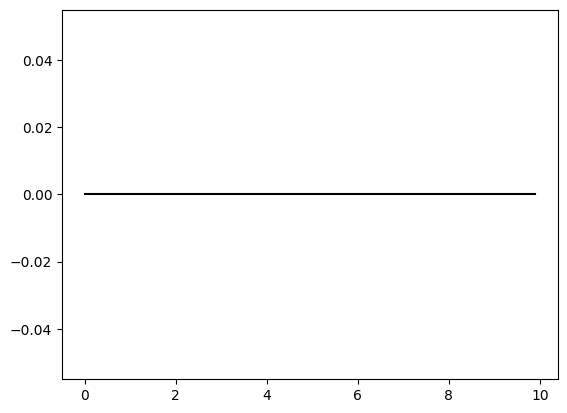

In [9]:
plt.plot(t,tk,'k-')

In [35]:
import numpy as np
import scipy
from scipy import special
from numpy.polynomial.hermite import hermfit,hermval
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import math
from scipy.signal import savgol_filter

def fun(coe,x,y,dt):
    len_c=len(coe)
    len_a=int(len_c/3)
    a_coe=np.zeros(len_a); b_coe=np.zeros(len_a); c_coe=np.zeros(len_a)
    nk=0
    for ik in range(len_a):
        a_coe[ik]=coe[nk]
        nk=nk+1
    for ik in range(len_a):
        b_coe[ik]=coe[nk]
        nk=nk+1
    for ik in range(len_a):
        c_coe[ik]=coe[nk]
        nk=nk+1
    resk=0.0
# Collocation points
    for ik in range(1,len_a-1):
        resk=resk+(c_coe[ik]-2.0*a_coe[ik]*dt+y[ik])**2
        dx1=x[ik-1]-x[ik]; dx2=x[ik+1]-x[ik]
        resk=resk+(a_coe[ik]*dx1*dx1+b_coe[ik]*dx1+c_coe[ik]-c_coe[ik-1])**2
        resk=resk+(a_coe[ik]*dx2*dx2+b_coe[ik]*dx2+c_coe[ik]-c_coe[ik+1])**2
# Boundary Condition
    ik=0
    resk=resk+(c_coe[ik]-2.0*a_coe[ik]*dt+y[ik])**2
    dx1=0.0-x[ik]; dx2=x[ik+1]-x[ik]
    resk=resk+(a_coe[ik]*dx2*dx2+b_coe[ik]*dx2+c_coe[ik]-c_coe[ik+1])**2
  #  resk=resk+(2.0*dx1*a_coe[ik]+b_coe[ik]+5.0)**2
    resk=resk+(b_coe[ik]+5.0)**2
    
    ik=len_a-1
    resk=resk+(c_coe[ik]-2.0*a_coe[ik]*dt+y[ik])**2
    dx1=x[ik-1]-x[ik]; dx2=1000.0-x[ik]
    resk=resk+(a_coe[ik]*dx1*dx1+b_coe[ik]*dx1+c_coe[ik]-c_coe[ik-1])**2
    resk=resk+(a_coe[ik]*dx2*dx2+b_coe[ik]*dx2+c_coe[ik]-0.0)**2
    
    print (resk)
    return resk*0.5

def fun_der(coe,x,y,dt):
    len_c=len(coe)
    dev=np.zeros(len_c)
    len_a=int(len_c/3)
    a_coe=np.zeros(len_a); b_coe=np.zeros(len_a); c_coe=np.zeros(len_a)
    a_dev=np.zeros(len_a); b_dev=np.zeros(len_a); c_dev=np.zeros(len_a)
    nk=0
    for ik in range(len_a):
        a_coe[ik]=coe[nk]
        nk=nk+1
    for ik in range(len_a):
        b_coe[ik]=coe[nk]
        nk=nk+1
    for ik in range(len_a):
        c_coe[ik]=coe[nk]
        nk=nk+1
    
    resk=0.0
# Collocation points
    for ik in range(1,len_a-1):
        resk=resk+c_coe[ik]-2.0*a_coe[ik]*dt+y[ik]
        dx1=x[ik-1]-x[ik]; dx2=x[ik+1]-x[ik]
        resk=resk+(a_coe[ik]*dx1*dx1+b_coe[ik]*dx1+c_coe[ik]-c_coe[ik-1])
        resk=resk+(a_coe[ik]*dx2*dx2+b_coe[ik]*dx2+c_coe[ik]-c_coe[ik+1])
# Boundary Condition
    ik=0
    resk=resk+(c_coe[ik]-2.0*a_coe[ik]*dt+y[ik])
    dx1=0.0-x[ik]; dx2=x[ik+1]-x[ik]
    resk=resk+(a_coe[ik]*dx2*dx2+b_coe[ik]*dx2+c_coe[ik]-c_coe[ik+1])
  #  resk=resk+(2.0*dx1*a_coe[ik]+b_coe[ik]+5.0)
    resk=resk+(b_coe[ik]+5.0)
    
    ik=len_a-1
    resk=resk+(c_coe[ik]-2.0*a_coe[ik]*dt+y[ik])**2
    dx1=x[ik-1]-x[ik]; dx2=1000.0-x[ik]
    resk=resk+(a_coe[ik]*dx1*dx1+b_coe[ik]*dx1+c_coe[ik]-c_coe[ik-1])
    resk=resk+(a_coe[ik]*dx2*dx2+b_coe[ik]*dx2+c_coe[ik]-0.0)
# Compute Jacobian Matrix
# Collocation points
    for ik in range(1,len_a-1):
        dx1=x[ik-1]-x[ik]; dx2=x[ik+1]-x[ik]
        a_dev[ik]=a_dev[ik]+resk*(-2.0*dt+dx1*dx1+dx2*dx2)
        b_dev[ik]=b_dev[ik]+resk*(dx1+dx2)
        c_dev[ik]=c_dev[ik]+resk*3.0
        c_dev[ik-1]=c_dev[ik-1]+resk*(-1.0)
        c_dev[ik+1]=c_dev[ik+1]+resk*(-1.0)
# Boundary Condition
    ik=0
    dx1=0.0-x[ik]; dx2=x[ik+1]-x[ik]
#    a_dev[ik]=a_dev[ik]+resk*(-2.0*dt+dx2*dx2+2.0*dx1)
    a_dev[ik]=a_dev[ik]+resk*(-2.0*dt+dx2*dx2)
    b_dev[ik]=b_dev[ik]+resk*(dx2+1.0)
    c_dev[ik]=c_dev[ik]+resk*2.0
    c_dev[ik+1]=c_dev[ik+1]+resk*(-1.0)
    
    ik=len_a-1
    dx1=x[ik-1]-x[ik]; dx2=1000.0-x[ik]
    a_dev[ik]=a_dev[ik]+resk*(-2.0*dt+dx1*dx1+dx2*dx2)
    b_dev[ik]=b_dev[ik]+resk*(dx1+dx2)
    c_dev[ik]=c_dev[ik]+resk*3.0
    c_dev[ik-1]=c_dev[ik-1]+resk*(-1.0)
    
    nk=0
    for ik in range(len_a):
        dev[nk]=a_dev[ik]
        nk=nk+1
    for ik in range(len_a):
        dev[nk]=b_dev[ik]
        nk=nk+1
    for ik in range(len_a):
        dev[nk]=c_dev[ik]
        nk=nk+1
    print (np.max(dev))
    return dev

t=np.zeros(100)
for ik in range(100):
    t[ik]=0.1*ik
coe=np.zeros(999*3)
x=np.zeros(999)
for ik in range(999):
    x[ik]=(ik+1)*1.0
y=np.zeros(1000)
dt=0.1
tk=np.zeros(100)
for ik in range(1,100):
    res=scipy.optimize.minimize(fun,coe,args=(x,y,dt),method='L-BFGS-B',jac=fun_der)
    coe=res.x
    len_c=len(coe); len_a=int(len_c/3)
    a_coe=np.zeros(len_a); b_coe=np.zeros(len_a); c_coe=np.zeros(len_a)
    nk=0
    for jk in range(len_a):
        a_coe[jk]=coe[nk]
        nk=nk+1
    for jk in range(len_a):
        b_coe[jk]=coe[nk]
        nk=nk+1
    for jk in range(len_a):
        c_coe[jk]=coe[nk]
        nk=nk+1
    for jk in range(999):
        y[jk]=c_coe[jk]
    tk[ik]=y[20]
    print (ik)
        

25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.99750281635389
24.99999875575283
9.999472612020403
24.99999973723952
9.999888627940997
24.999999944511817
9.999976481200555
24.999999988282415
9.999995033475932
24.99999999752557
9.99999895120738
24.999999999477467
9.99999977852402
24.999999999889653
9.999999953230404
24.999999999976694
9.999999990123554
24.99999999999508
9.999999997914369
1
25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.997502

8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.99750281635389
24.99999875575283
9.999472612020403
24.99999973723952
9.999888627940997
24.999999944511817
9.999976481200555
24.999999988282415
9.999995033475932
24.99999999752557
9.99999895120738
24.999999999477467
9.99999977852402
24.999999999889653
9.999999953230404
24.999999999976694
9.999999990123554
24.99999999999508
9.999999997914369
13
25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.99750281635389
24.99999875575283
9.999472612020403
24.99999973723952
9.999888627940997
24.999999944511817
9.999976481200555
24.999999988282415
9.999995033475932
24.99999999752557
9.

9.999999997914369
25
25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.99750281635389
24.99999875575283
9.999472612020403
24.99999973723952
9.999888627940997
24.999999944511817
9.999976481200555
24.999999988282415
9.999995033475932
24.99999999752557
9.99999895120738
24.999999999477467
9.99999977852402
24.999999999889653
9.999999953230404
24.999999999976694
9.999999990123554
24.99999999999508
9.999999997914369
26
25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.99

0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.99750281635389
24.99999875575283
9.999472612020403
24.99999973723952
9.999888627940997
24.999999944511817
9.999976481200555
24.999999988282415
9.999995033475932
24.99999999752557
9.99999895120738
24.999999999477467
9.99999977852402
24.999999999889653
9.999999953230404
24.999999999976694
9.999999990123554
24.99999999999508
9.999999997914369
39
25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.99750281635389
24.99999875575283
9.999472612020403
24.99999973723952
9.999888627940997
24.9999999445

9.99999977852402
24.999999999889653
9.999999953230404
24.999999999976694
9.999999990123554
24.99999999999508
9.999999997914369
51
25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.99750281635389
24.99999875575283
9.999472612020403
24.99999973723952
9.999888627940997
24.999999944511817
9.999976481200555
24.999999988282415
9.999995033475932
24.99999999752557
9.99999895120738
24.999999999477467
9.99999977852402
24.999999999889653
9.999999953230404
24.999999999976694
9.999999990123554
24.99999999999508
9.999999997914369
52
25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999

9.999472612020403
24.99999973723952
9.999888627940997
24.999999944511817
9.999976481200555
24.999999988282415
9.999995033475932
24.99999999752557
9.99999895120738
24.999999999477467
9.99999977852402
24.999999999889653
9.999999953230404
24.999999999976694
9.999999990123554
24.99999999999508
9.999999997914369
64
25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.99750281635389
24.99999875575283
9.999472612020403
24.99999973723952
9.999888627940997
24.999999944511817
9.999976481200555
24.999999988282415
9.999995033475932
24.99999999752557
9.99999895120738
24.999999999477467
9.99999977852402
24.999999999889653
9.999999953230404
24.999999999976694
9.999999990123554
24.99999999999508
9.999999997914369
65
25.0
10.0
26.32106

24.999999988282415
9.999995033475932
24.99999999752557
9.99999895120738
24.999999999477467
9.99999977852402
24.999999999889653
9.999999953230404
24.999999999976694
9.999999990123554
24.99999999999508
9.999999997914369
77
25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.99750281635389
24.99999875575283
9.999472612020403
24.99999973723952
9.999888627940997
24.999999944511817
9.999976481200555
24.999999988282415
9.999995033475932
24.99999999752557
9.99999895120738
24.999999999477467
9.99999977852402
24.999999999889653
9.999999953230404
24.999999999976694
9.999999990123554
24.99999999999508
9.999999997914369
78
25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.9855155

24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.99750281635389
24.99999875575283
9.999472612020403
24.99999973723952
9.999888627940997
24.999999944511817
9.999976481200555
24.999999988282415
9.999995033475932
24.99999999752557
9.99999895120738
24.999999999477467
9.99999977852402
24.999999999889653
9.999999953230404
24.999999999976694
9.999999990123554
24.99999999999508
9.999999997914369
90
25.0
10.0
26.321062455364707
0.0
25.36280860217371
0.0
25.0744316069756
0.0
24.998158205056022
0.0
24.985515525715385
0.0
24.991173045711122
5.395242067738778
24.9973454738677
8.817979861269652
24.999389040217526
9.738253646524523
24.999868533796164
9.944150772911705
24.99997212673872
9.988180173430447
24.999994108958518
9.99750281635389
24.99999875575283
9.999472612020403
24.99999973723952
9.999888627940997
24.999999944511817
9.999976481200555
24.

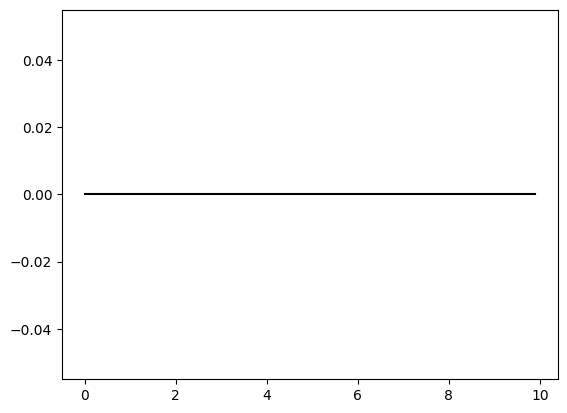

In [34]:
plt.plot(t,tk,'k-')